# M5HW Assignment: P Burke
## Module 5 Assignment

Submit this code as a pull request back to GitHub Classroom by the date and time listed in Canvas.

For this assignment, use the dataset called `radar_parameters.csv` provided in the GitHub repository in the folder `homework`.

## Dataset Description

The training data consists of polarimetric radar parameters calculated from a disdrometer (an instrument that measures rain drop sizes, shapes, and rainfall rate) measurements from several years in Huntsville, Alabama. A model called `pytmatrix` is used to calculate polarimetric radar parameters from the droplet observations, which can be used as a way to compare what a remote sensing instrument would see and rainfall.

## Data columns

Features (radar measurements):

`Zh` - radar reflectivity factor (dBZ) - use the formula $dBZ = 10\log_{10}(Z)$

`Zdr` - differential reflectivity

`Ldr` - linear depolarization ratio

`Kdp` - specific differential phase

`Ah` - specific attenuation

`Adp` - differential attenuation

Target :

`R` - rain rate

## Assignment Tasks

**Task 1.** Split the data into a 70-30 split for training and testing data.

In [9]:
#import os
#import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression

#from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('./homework/radar_parameters.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18969 entries, 0 to 18968
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18969 non-null  int64  
 1   Zh (dBZ)        18969 non-null  float64
 2   Zdr (dB)        18969 non-null  float64
 3   Ldr (dB)        18969 non-null  float64
 4   Kdp (deg km-1)  18969 non-null  float64
 5   Ah (dBZ/km)     18969 non-null  float64
 6   Adr (dB/km)     18969 non-null  float64
 7   R (mm/hr)       18969 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.2 MB


In [ ]:
df.describe()

In [ ]:
%matplotlib inline
#import seaborn as sns; sns.set()
#sns.pairplot(iris, hue='petal_width', size=1.5);
sns.pairplot(df, hue='R (mm/hr)', size=1.5);

In [4]:
# Create feature dataframe

df_X = df.drop('R (mm/hr)', axis=1)
df_X.shape

(18969, 7)

In [5]:
# Create target dataframe

df_y = df['R (mm/hr)']
df_y.shape

(18969,)

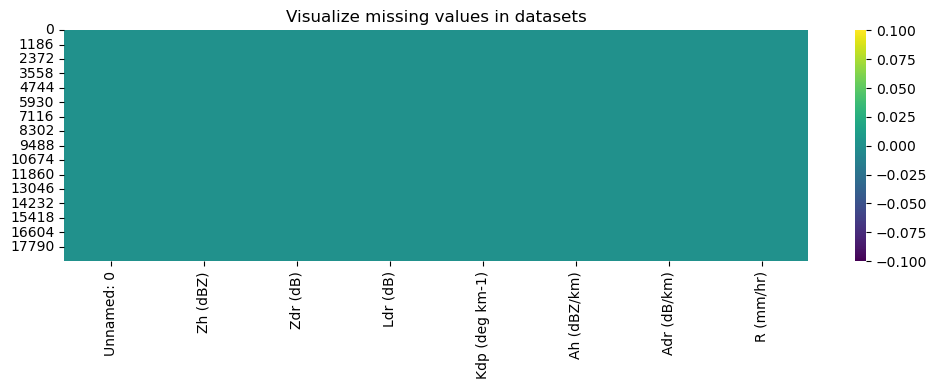

In [6]:
# Check for missing values

plt.figure(figsize=(12, 3))
sns.heatmap(df.isnull(), cmap='viridis');
plt.title('Visualize missing values in datasets');

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

**Task 2.** Using the split created in Task 1, train a multiple linear regression dataset using the training dataset, and validate it using the testing dataset. 

_Note:_ Not sure if there is another model class in `sklearn` that is more relevant to mlr.

In [17]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

LinearRegression()

In [18]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.9601211025173522e-06
Model intercept: -29.23405142504312


_Note:_ In order to confirm choice of model and hyperparameters are correct, we need a way to *validate* that our model and our hyperparameters are a good fit to the data.
While this may sound simple, there are some pitfalls that you must avoid to do this effectively.  
`accuracy_score()` didn't work, as that is designed for classification tasks not continuos data. Instead I use `sklearn.metrics::r2_score`

In [31]:
y_test_model = model.predict(X_test)

In [37]:
from sklearn import metrics
metrics.r2_score(y_test, y_test_model)

0.989104571558249

Ok, try another approach: cross-validation

In [38]:
y2_model = model.fit(X_test, y_test).predict(X_train)
y1_model = model.fit(X_train, y_train).predict(X_test)
metrics.r2_score(y_test, y1_model), metrics.r2_score(y_train, y2_model)

(0.989104571558249, 0.9853727718017462)

Now: compare the $R^2$ and root mean square errors of model on the training and testing sets to a baseline prediction of rain rate using the formula $Z = 200 R^{1.6}$.

In [39]:
r2 = metrics.r2_score(y_test, y1_model), metrics.r2_score(y_train, y2_model)
rmse = metrics.mean_squared_error(y_test, y1_model), metrics.mean_squared_error(y_train, y2_model)

In [44]:
Z = 1
r = (Z/200)**(8/5)
r

0.0002081383018504682

**Task 3.** Repeat Task 1 doing a grid search over polynomial orders, using a grid search over orders 0-21, and use cross-validation of 7 folds.  For the best polynomial model in terms of $R^2$, does it outperform the baseline and the linear regression model in terms of $R^2$ and root mean square error?

**Task 4** Repeat Task 1 with a Random Forest Regressor, and perform a grid_search on the following parameters:
   
   ```python
   {'bootstrap': [True, False],  
   'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],  
   'max_features': ['auto', 'sqrt'],  
   'min_samples_leaf': [1, 2, 4],  
   'min_samples_split': [2, 5, 10],  
   'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
   ```
  Can you beat the baseline, or the linear regression, or best polynomial model with the best optimized Random Forest Regressor in terms of $R^2$ and root mean square error?